# **CROP YIELD DATA ANALYSIS USING DT & RF**

In [11]:
# Need to import packages according to the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

In [12]:
# Read the dataset with pandas function
df=pd.read_csv(r'csv_file/final_dataset_nonan.csv',encoding='latin-1')

# **Exploratory Data Analysis [EDA]**

In [13]:
#Let's print the first 5 records of the data set
df.head()

,State,Year,Crop,Area,Rain,Production
0,11,2000,64,1254.0,2763.2,2000.0
1,11,2000,71,2.0,2763.2,1.0
2,11,2000,39,102.0,2763.2,321.0
3,11,2000,99,176.0,2763.2,641.0
4,11,2000,102,720.0,2763.2,165.0


In [14]:
#Let's print the last 5 records of the dataset 
df.tail()

,State,Year,Crop,Area,Rain,Production
76098,3,2014,12,26.0,1287.4,172.0
76099,3,2014,48,5346.0,1287.4,4630.0
76100,3,2014,39,9919.0,1287.4,16499.0
76101,3,2014,103,3.0,1287.4,3.0
76102,3,2014,77,35417.0,1287.4,49689.0


In [15]:
#Let's print the column name
df.columns

Index(['State', 'Year', 'Crop', 'Area', 'Rain', 'Production'], dtype='object')

In [16]:
# shape of the dataset
df.shape

(76103, 6)

In [17]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
76098    False
76099    False
76100     True
76101    False
76102    False
Length: 76103, dtype: bool

In [18]:
#Let's print the total number of duplicated value
df.duplicated().sum()

2064

In [19]:
#Let's print the unique values in our dataset
df.nunique()

State            12
Year             19
Crop            107
Area          16023
Rain            176
Production    22933
dtype: int64

In [20]:
#Let's print the data types in our data
df.dtypes

State           int64
Year            int64
Crop            int64
Area          float64
Rain          float64
Production    float64
dtype: object

In [21]:
#descriptive statistics summary
df.describe

<bound method NDFrame.describe of        State  Year  Crop     Area    Rain  Production
0         11  2000    64   1254.0  2763.2      2000.0
1         11  2000    71      2.0  2763.2         1.0
2         11  2000    39    102.0  2763.2       321.0
3         11  2000    99    176.0  2763.2       641.0
4         11  2000   102    720.0  2763.2       165.0
...      ...   ...   ...      ...     ...         ...
76098      3  2014    12     26.0  1287.4       172.0
76099      3  2014    48   5346.0  1287.4      4630.0
76100      3  2014    39   9919.0  1287.4     16499.0
76101      3  2014   103      3.0  1287.4         3.0
76102      3  2014    77  35417.0  1287.4     49689.0

[76103 rows x 6 columns]>

In [22]:
#Let's get the overall information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76103 entries, 0 to 76102
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       76103 non-null  int64  
 1   Year        76103 non-null  int64  
 2   Crop        76103 non-null  int64  
 3   Area        76103 non-null  float64
 4   Rain        76103 non-null  float64
 5   Production  76103 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 3.5 MB


In [23]:
#Let's check the total number of null values present in our dataset 
df.isnull().sum()

State         0
Year          0
Crop          0
Area          0
Rain          0
Production    0
dtype: int64

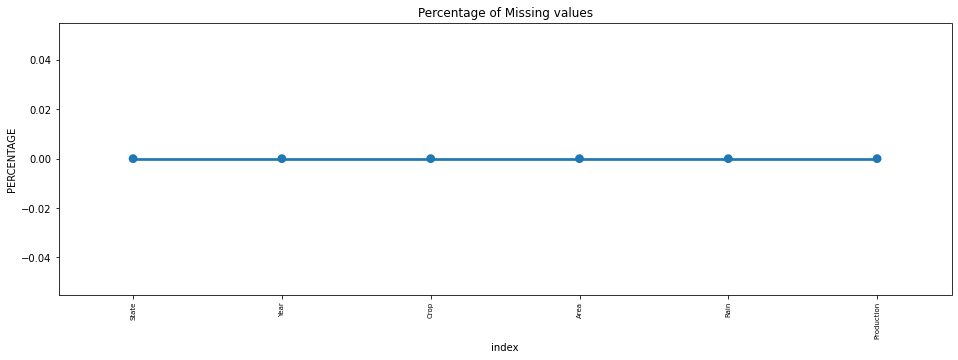

In [24]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

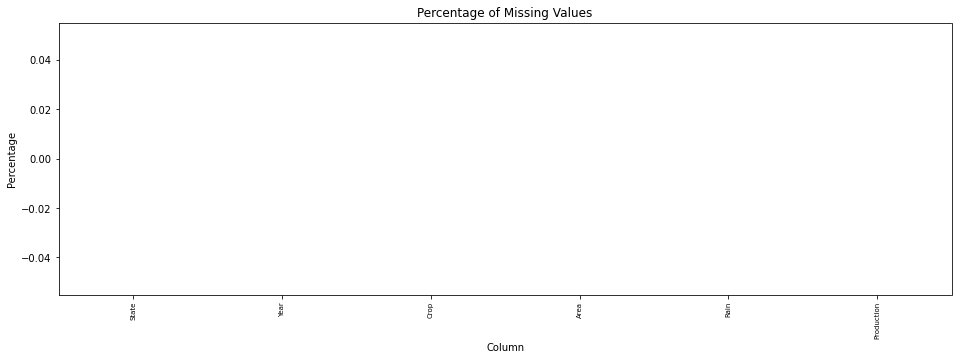

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of missing values in each column
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['Column', 'Missing Percentage']

# Plotting the graph
plt.figure(figsize=(16, 5))
ax = sns.barplot(x='Column', y='Missing Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

# **BOXPLOT**

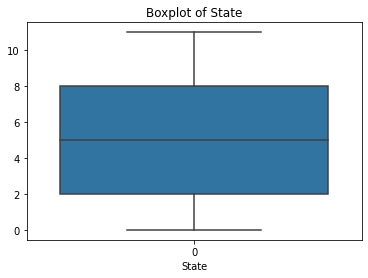

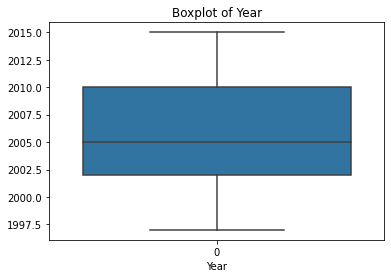

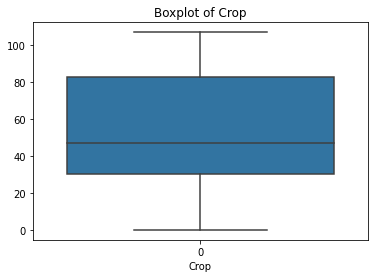

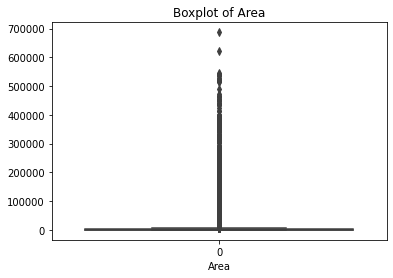

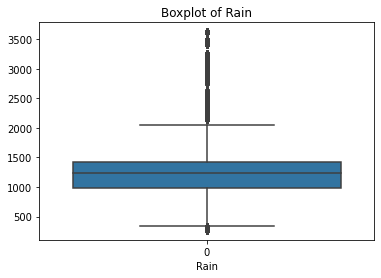

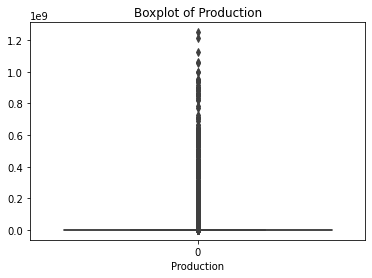

In [26]:
# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(data=df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

# Display the boxplots
plt.show()

# **REMOVING OUTLIERS**

In [27]:
# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Iterate over each numerical column and remove outliers
for column in numerical_columns:
    remove_outliers_iqr(column)

# **After removing Outliers boxplot**

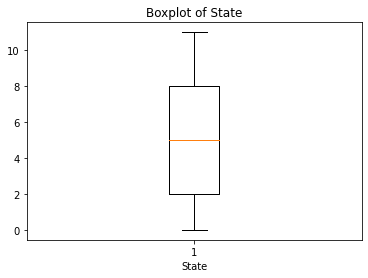

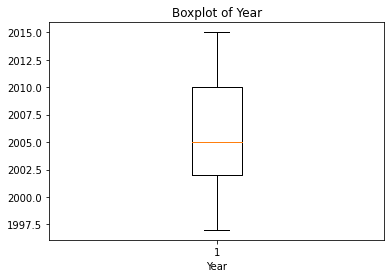

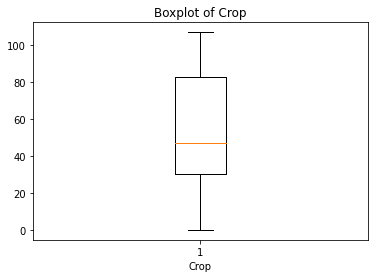

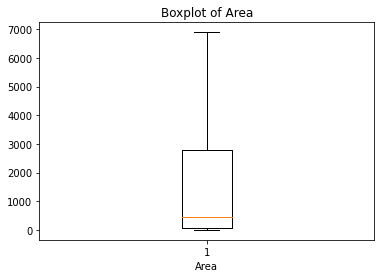

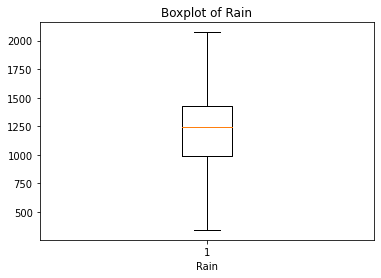

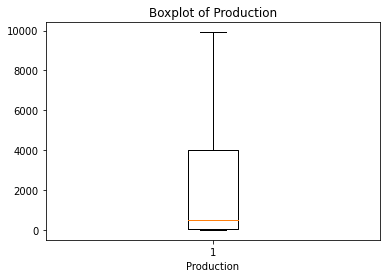

In [28]:
# Assuming you have a DataFrame named 'df' containing your data

# Get the numerical columns of the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    plt.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

# Display the boxplots
plt.show()

# **Jointplot**

# **Histogram**

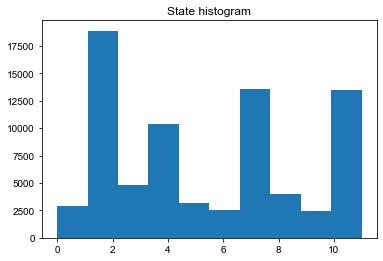

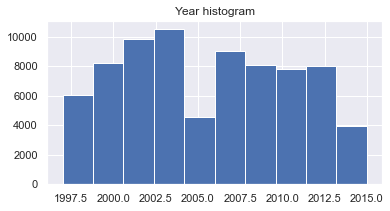

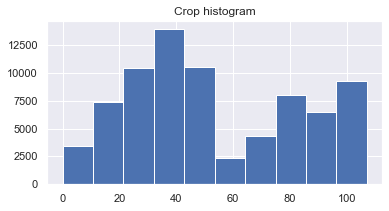

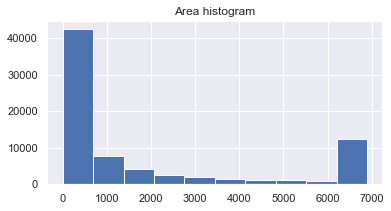

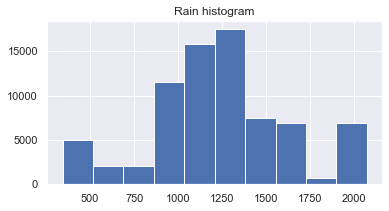

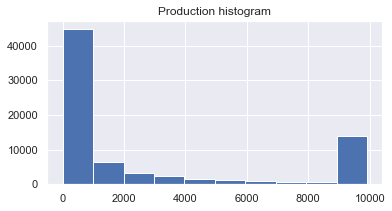

In [30]:
# Loop over the columns of the DataFrame
for column in df.columns:
    # Check if the column is numerical
    if pd.api.types.is_numeric_dtype(df[column]):
        # Plot a histogram for the numerical column
        plt.hist(df[column])
        sns.set(rc={'figure.figsize':(6,3)})
        plt.title(column + ' histogram')
        plt.show()

<AxesSubplot:>

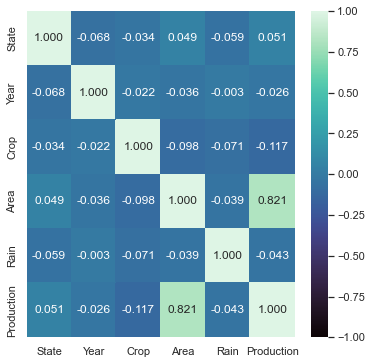

In [35]:
# Does more engine means higher chance of survivilbility ??? thats a new finding?
sns.set()
f=plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot= True, fmt=".3f", cmap="mako" )

# **PREPROCESSING**

In [36]:
df.head()

,State,Year,Crop,Area,Rain,Production
0,11,2000,64,1254.0,2072.3,2000.0
1,11,2000,71,2.0,2072.3,1.0
2,11,2000,39,102.0,2072.3,321.0
3,11,2000,99,176.0,2072.3,641.0
4,11,2000,102,720.0,2072.3,165.0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [39]:
x=df.drop(['Production'],axis=1)
y=df['Production']

In [40]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size=0.3, random_state=42)

In [43]:
#Random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain )

# predicting on test data 
y_pred = rf.predict(xtest)

# calculating r2_score 
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

r2 = r2_score(ytest,y_pred)

print(f'The R2 score is {r2}')

The R2 score is 0.9489919423529295
